<a href="https://colab.research.google.com/github/emmendezp/AlgorithmsUN2021II/blob/main/Lab%2016/AlgorithmicToolboxWeek6Group24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Toolbox Week 6

## 6-1: Maximum Amount of Gold

In [ ]:
import sys
def knapsack(W,w):
    value=dict()
    n=len(w)
    for i in range(n):
        value[0,i]=0
    for x in range(W+1):
        value[x,0]=0
    for i in range(1,n+1):
        for x in range(1,W+1):
            value[x,i]=value[x,i-1]
            if w[i-1]<=x:
                val=value[x-w[i-1],i-1]+w[i-1]
                if val>value[x,i]:
                    value[x,i]=val
    #print(value)
    return value[W,n]

if __name__ == '__main__':
    input = sys.stdin.read()
    W, n, *w = list(map(int, input.split()))
    print(knapsack(W, w))
                


# In[14]:


knapsack(10,[1,4,8])

## 6-2: Partitioning Souvenirs

In [ ]:
import numpy

# Discrete Knapsack problem without repetition
def partitions(W, n, items):
    """ Finds if number of partitions having capacity W is >=3
    (int, int, list) -> (int) """
    count = 0 
    value = numpy.zeros((W+1, n+1))
    for i in range(1, W+1):
        for j in range(1, n+1):
            value[i][j] = value[i][j-1]
            if items[j-1]<=i:
                temp = value[i-items[j-1]][j-1] + items[j-1]
                if temp > value[i][j]:
                    value[i][j] = temp
            if value[i][j] == W: count += 1

    if count < 3: print('0')
    else: print('1')

if __name__ == '__main__':
    n = int(input())
    item_weights = [int(i) for i in input().split()]
    total_weight = sum(item_weights)
    if n<3: 
        print('0')
    elif total_weight%3 != 0: 
        print('0')
    else:
        partitions(total_weight//3, n, item_weights)
        

## 6-3: Maximum Value of an Arithmetic Expression

In [ ]:
# Uses python3
import math
def calc(a, b, op):
    """ Evaluates the expression (a op b)
    (int, int, char) -> (int) """
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    else:
        return a * b


def MinAndMax(M, m, i, j, operators):
    """ Finds the optimal values i.e. min and max for a subproblem 
    (2D-array, 2D-array, int, int, list) -> (int, int) """
    min_value = math.inf
    max_value = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operators[k])
        b = calc(M[i][k], m[k+1][j], operators[k])
        c = calc(m[i][k], M[k+1][j], operators[k])
        d = calc(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
    return min_value, max_value


def get_maximum_value(operands, operators):
    """ Adds parentheses to a given arithmetic expression to maximize its value 
    (list, list) -> (int) """
    n = len(operands)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operands[i]
        M[i][i] = operands[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operators)

    return M[0][n-1]


if __name__ == "__main__":
    expression = input()
    operators, operands = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operators.append(i)
        else:
            operands.append(int(i))

    print(get_maximum_value(operands, operators))


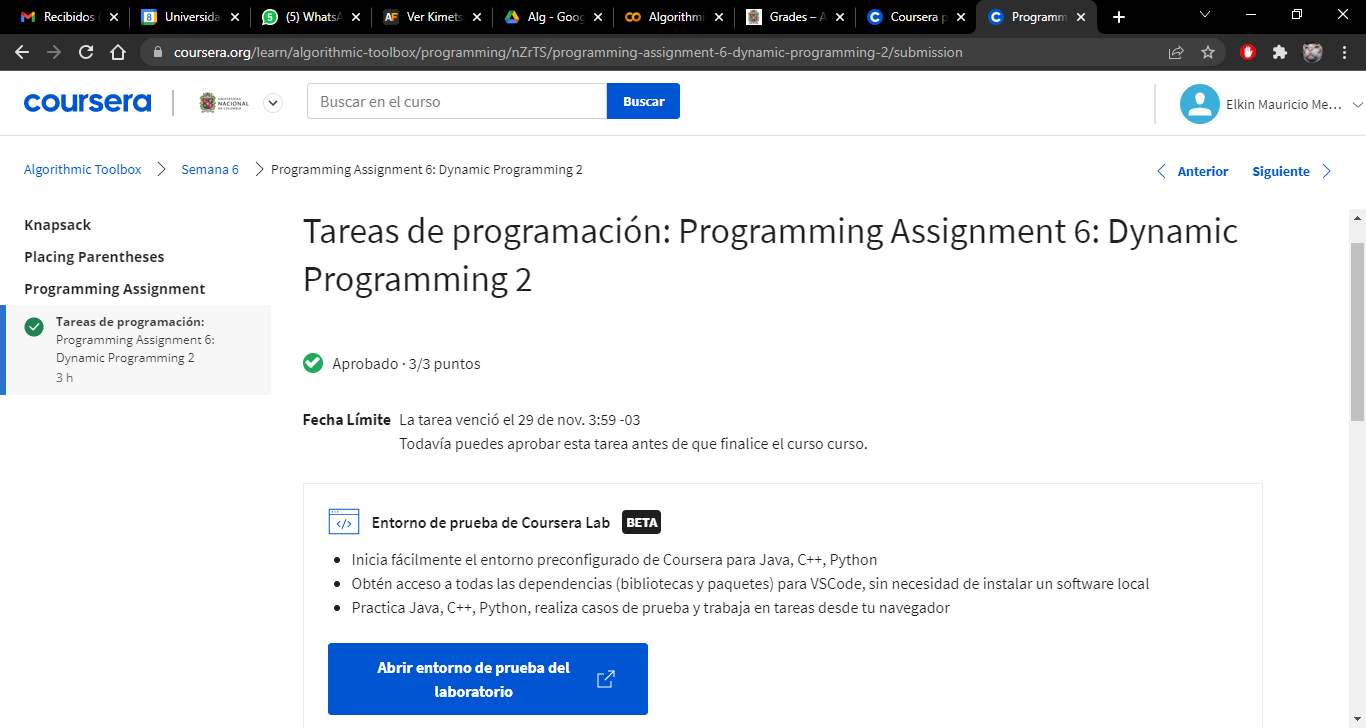

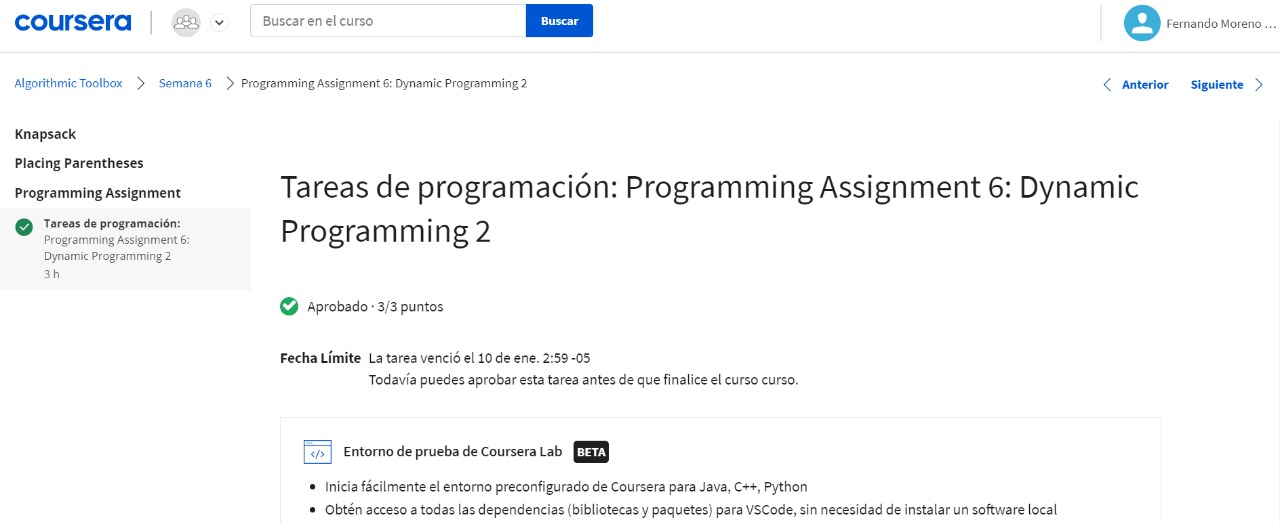

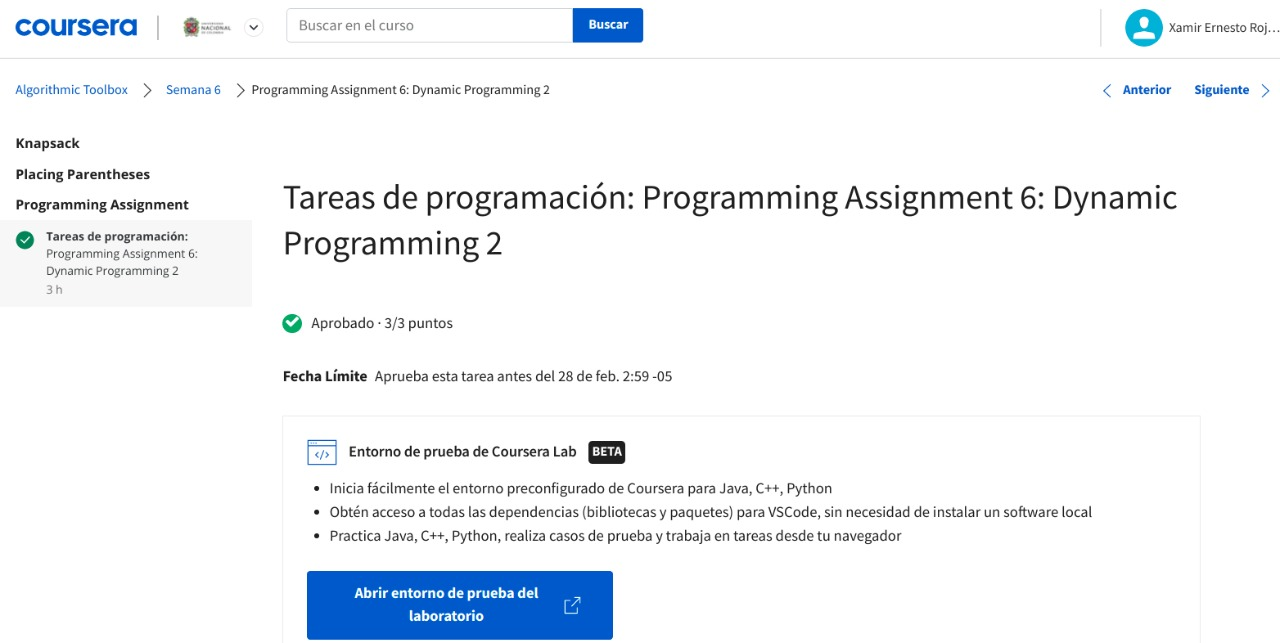